In [1]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image

from align import *

In [2]:
sift = cv2.xfeatures2d.SIFT_create()

In [23]:
im_lst = './select_changjing/changjing.txt'
output = './outputs/'
image_dir = './changjing/'

ratio = 0.3
iter_num = 2000
fit_pos_cnt_thresh = 30

In [25]:
with open(im_lst, 'r') as f:
    lines = f.readlines()
cnt = len(lines)

In [27]:
ori_ims = []
trans_ims = []

In [28]:
for i, l in enumerate(lines):
    line = l.strip().strip('\n')[13:]
    if '_' in line:
        sku = line.split('_')[0]
        or_im_path = sku + '.png'
        tr_im_path = sku + '_1.png'
        
        ori_ims.append(or_im_path)
        trans_ims.append(tr_im_path)
    if i % 10000 == 0:
        print('%d / %d' % (i, cnt))
    

0 / 942


In [33]:
for or_im, tr_im in zip(ori_ims, trans_ims):
    or_im_path = image_dir + or_im
    tr_im_path = image_dir + tr_im
    if not os.path.exists(or_im_path) or not os.path.exists(tr_im_path):
#         print('not found.')
        continue
    target_im = np.array(Image.open(or_im_path))
    source_im = np.array(Image.open(tr_im_path))
    source_rgb = source_im[:, :, :3]
    a = source_im[:, :, 3]
    a3 = np.stack([a, a, a], axis=-1)
    
    kp_s, desc_s = extract_sift(source_rgb)
    kp_t, desc_t = extract_sift(target_im)
    fit_pos = match_sift(desc_s, desc_t)
    
    print(fit_pos.shape[0])
    if fit_pos.shape[0] < fit_pos_cnt_thresh:
        print(fit_pos.shape[0])
        os.remove(or_im_path)
        os.remove(tr_im_path)
        print('not same image')
        continue
    
    m = affine_matrix(kp_s, kp_t, fit_pos)
    merge, warp_rgb, source = warp_image(source_rgb, target_im, m)
    am, warp_a, _  = warp_image(a3, target_im, m)
    
    warp_a = warp_a[:, :, 0]
    warp_a = np.expand_dims(warp_a, axis=-1)
    merge = np.concatenate((warp_rgb, warp_a), axis=2)
    
    sku = or_im.split('.')[0]
    save_path = output + sku + '_2.png'
    or_new_path = output + or_im
    tr_new_path = output + tr_im
    shutil.move(or_im_path, or_new_path)
    shutil.move(tr_im_path, tr_new_path)
    Image.fromarray(merge.astype(np.uint8)).save(save_path)
    print('precess %s' % save_path)
    

1845
precess ./outputs/378385_2.png
42
precess ./outputs/381326_2.png
156
precess ./outputs/397671_2.png
225
precess ./outputs/406900_2.png
70
precess ./outputs/406946_2.png
158
precess ./outputs/408008_2.png
233
precess ./outputs/431028_2.png
31
precess ./outputs/517645_2.png
45
precess ./outputs/517762_2.png
50
precess ./outputs/537151_2.png
74
precess ./outputs/541395_2.png
85
precess ./outputs/554544_2.png
308
precess ./outputs/555644_2.png
112
precess ./outputs/559001_2.png
185
precess ./outputs/646197_2.png
273
precess ./outputs/661485_2.png
101
precess ./outputs/664485_2.png
522
precess ./outputs/678775_2.png
109
precess ./outputs/680579_2.png
88
precess ./outputs/689563_2.png
35
precess ./outputs/700366_2.png
449
precess ./outputs/709760_2.png
276
precess ./outputs/709823_2.png
260
precess ./outputs/709835_2.png
160
precess ./outputs/732249_2.png
60
precess ./outputs/733430_2.png
76
precess ./outputs/759040_2.png
157
precess ./outputs/782888_2.png
361
precess ./outputs/788271_2

In [9]:
or_im_path = './changjing/892611.png' # ori_ims[it]
tr_im_path = './changjing/892611_1.png' #trans_ims[it]

In [19]:
# Image.open(or_im_path)

In [12]:
# Image.open(tr_im_path)

In [13]:
target_im = np.array(Image.open(or_im_path))
source_im = np.array(Image.open(tr_im_path))
source_rgb = source_im[:, :, :3]
a = source_im[:, :, 3]
a3 = np.stack([a, a, a], axis=-1)

In [14]:
kp_s, desc_s = extract_sift(source_rgb)
kp_t, desc_t = extract_sift(target_im)
fit_pos = match_sift(desc_s, desc_t)

In [15]:
fit_pos.shape[0]

95

In [16]:
m = affine_matrix(kp_s, kp_t, fit_pos)

/media/cfs/yanpeifa/matting/dataset/matchimg_img/align.py:212: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(M, b)[0]


In [17]:
merge, warp, source = warp_image(source_rgb, target_im, m)
am, warpa, _  = warp_image(a3, target_im, m)

In [17]:
warpa1 = warpa[:, :, 0]
warpa1 = np.expand_dims(warpa1, axis=-1)

In [108]:
merge = np.concatenate((warp, warpa1), axis=2)

In [20]:
# Image.fromarray(merge.astype(np.uint8))

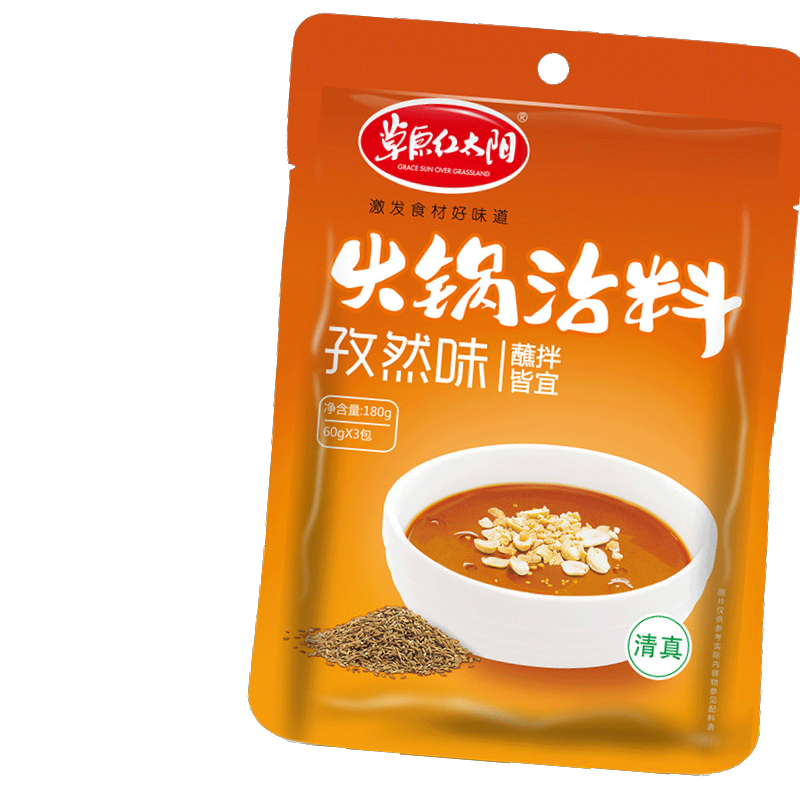

In [73]:
Image.fromarray(merge.astype(np.uint8))